In [1]:
!pip install lightgbm --root-user-action=ignore

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import all you need</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold , SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import learning_curve


In [3]:
df=pd.read_csv('/kaggle/input/parkinson-disease/parkinson_disease.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [5]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [6]:
df.select_dtypes(include='object')

""
0
1
2
3
4
...
751
752
753
754


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Preprocessing </p>

In [7]:
df.drop('id', axis=1, inplace=True)

In [8]:
columns = list(df.columns)
for col in columns:
    if col == 'class':
        continue

    filtered_columns = [col]
    for col1 in df.columns:
        if((col == col1) | (col == 'class')):
            continue

        val = df[col].corr(df[col1])

        if val > 0.7:
            # If the correlation between the two
            # features is more than 0.7 remove
            columns.remove(col1)
            continue
        else:
            filtered_columns.append(col1)

    # After each iteration filter out the columns
    # which are not highly correlated features.
    df = df[filtered_columns]
df.shape


(756, 313)

In [9]:
X = df.drop('class', axis=1)

float_columns = X.select_dtypes(include=['float64','int'])

selector = VarianceThreshold(threshold=0.1)
filtered_array = selector.fit_transform(float_columns)

# Get the selected feature names
selected_columns = float_columns.columns[selector.get_support()]

# Create new DataFrame with selected columns
df_filtered = pd.DataFrame(filtered_array, columns=selected_columns)

df_filtered['class'] = df['class']

print(df_filtered.shape)


(756, 116)


In [10]:
from sklearn.decomposition import PCA

# Reduce to 50 principal components (adjust n_components)
pca = PCA(n_components=50)
pca_result = pca.fit_transform(df_filtered.select_dtypes(include='float64'))

# Combine with non-float columns (e.g., 'id', 'class')
filtered_df = pd.concat([df_filtered[['class']], pd.DataFrame(pca_result)], axis=1)
filtered_df.shape

(756, 51)

In [11]:
X = filtered_df.drop('class', axis=1)
X_norm = MinMaxScaler().fit_transform(X)
selector = SelectKBest(chi2, k=25)
selector.fit(X_norm, filtered_df['class'])
filtered_columns = selector.get_support()
filtered_data = X.loc[:, filtered_columns]
filtered_data['class'] = df['class']
df = filtered_data
df.shape

<ipython-input-11-5ab0321eebbb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['class'] = df['class']


(756, 26)

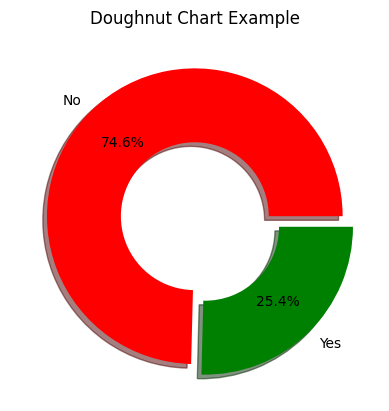

Class 0: 192
Class 1: 564


In [12]:
if 'class' in df.columns:
    flag_counts = df['class'].value_counts()

    plt.figure(dpi=100)
    plt.pie(flag_counts,
            labels=['No','Yes'],  # Set labels correctly
            colors=['red', 'green'],
            explode=(0, 0.1),  # Ensure explode matches number of categories
            autopct='%1.1f%%',
            pctdistance=0.7,
            shadow=True,
            wedgeprops=dict(width=0.5))  # Creates doughnut effect

    plt.title('Doughnut Chart Example')
    plt.show()
else:
    print("Column 'FLAG' not found in the dataset.")
target_count = df['class'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

In [13]:
X = df.drop(columns=['class'])
y = df['class']

# find best model by pycaret:

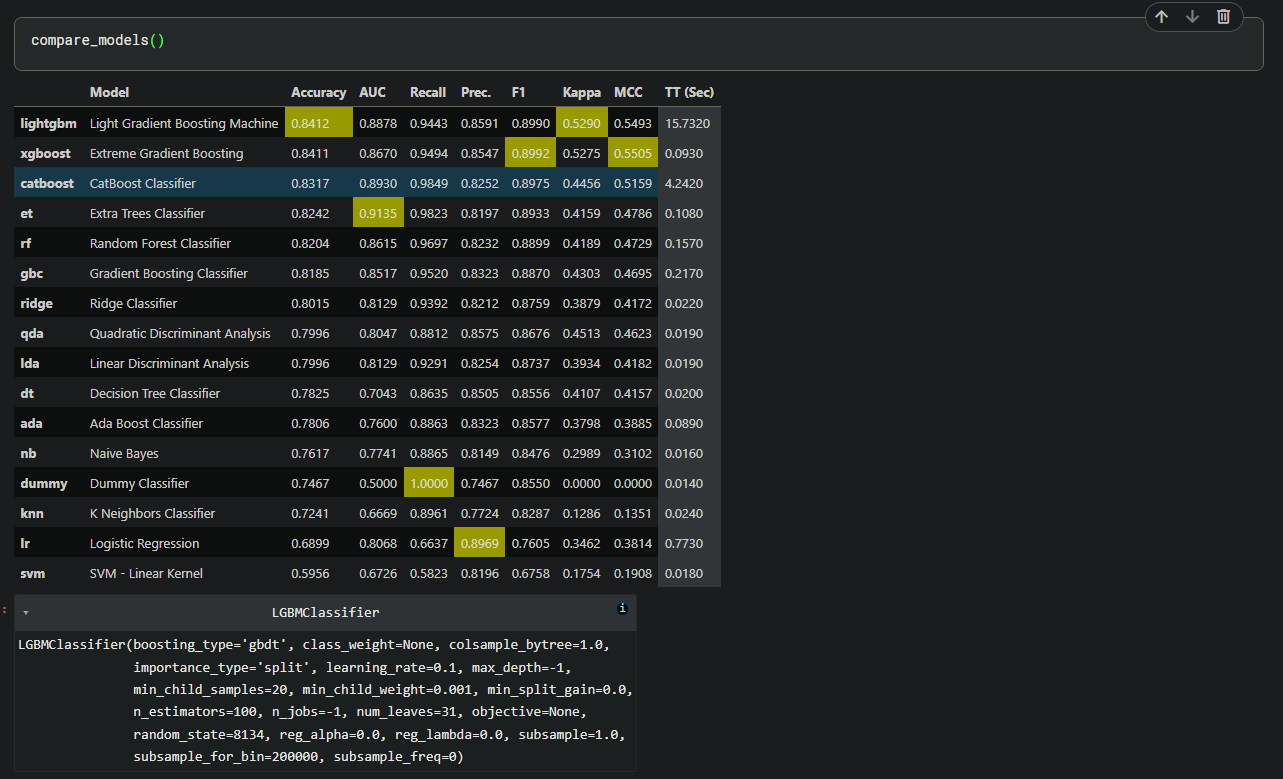

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">build best model</p>

In [14]:
def build_optimal_lightgbm_classifier(X, y, random_state=42, n_iter=50, cv=5):


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state, stratify=y
    )
    
    # Define the parameter search space
    param_dist = {
        'n_estimators': [100, 200, 300],  # Reduced options
        'learning_rate': [0.05, 0.1, 0.2],  # Removed very small rates
        'max_depth': [-1, 5, 7],  # Fewer depth options
        'num_leaves': [31, 63, 127],  # Reduced options
        'min_child_samples': [20, 50],  # Larger min samples
        'subsample': [0.8, 1.0],  # Fewer subsample options
        'colsample_bytree': [0.8, 1.0],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [0, 0.1],
    }
    
    # Base model
    base_model = lgb.LGBMClassifier(
        objective='binary' if len(np.unique(y)) == 2 else 'multiclass',
        boosting_type='gbdt',
        importance_type='gain',
        random_state=random_state,
        n_jobs=-1,
        verbose=-1
    )
    
    # Randomized search
    print("Starting hyperparameter tuning...")
    search = RandomizedSearchCV(
        base_model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='roc_auc' if len(np.unique(y)) == 2 else 'accuracy',
        cv=cv,
        random_state=random_state,
        n_jobs=-1,
        verbose=1
    )
    
    # Fit the model
    search.fit(X_train, y_train)
    
    # Get the best model
    best_model = search.best_estimator_
    
    # Make predictions on test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)
    
    # Calculate metrics based on problem type
    accur=accuracy_score(y_test, y_pred),    
    if len(np.unique(y)) == 2:
        roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    
    # Feature importance
    feature_importance = None
    if isinstance(X, pd.DataFrame):
        importance = best_model.feature_importances_
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importance
        }).sort_values('Importance', ascending=False)
    
    # Return results
    results = {
        'best_model': best_model,
        'best_params': search.best_params_,
    }
    
    print(f"Best parameters found: {search.best_params_}")
    print(f"Test ROC AUC: {roc_auc:.4f}")
    
    return results

In [15]:
results = build_optimal_lightgbm_classifier(X, y, random_state=42, n_iter=20, cv=3)

Starting hyperparameter tuning...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 31, 'n_estimators': 300, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Test ROC AUC: 0.9011


In [16]:
best_model = results['best_model']

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">model evaluation</p>

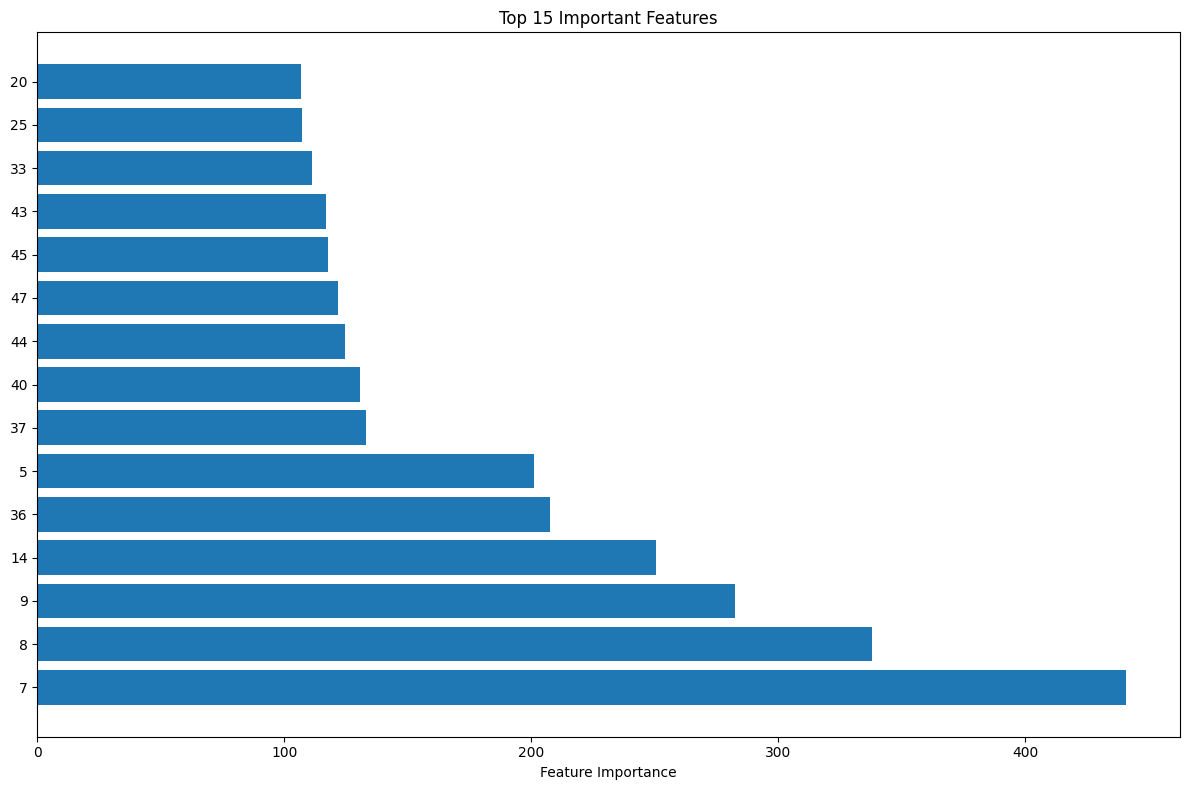

In [17]:
feature_importances = best_model.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = feature_importances[indices]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_importances[:15])), sorted_importances[:15], align='center')
plt.yticks(range(len(sorted_importances[:15])), sorted_feature_names[:15])
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=40, stratify=y)

y_test_pred = best_model.predict(X_test)

print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.96      0.99      0.97       113

    accuracy                           0.96       152
   macro avg       0.96      0.93      0.95       152
weighted avg       0.96      0.96      0.96       152



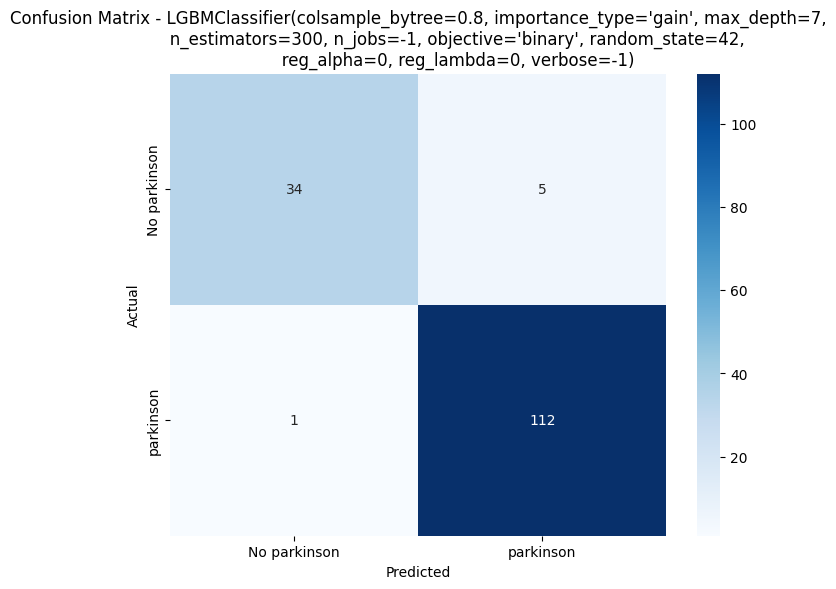

In [19]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No parkinson', 'parkinson'], 
            yticklabels=['No parkinson', 'parkinson'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model}')
plt.show()

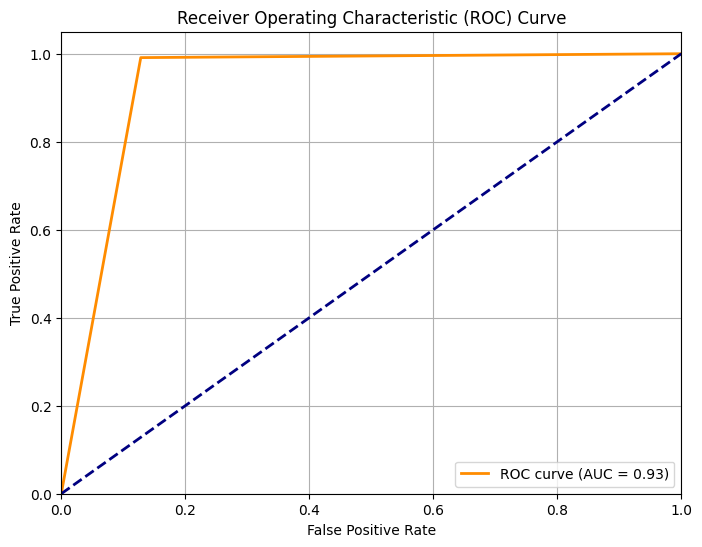

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()